### 한글 깨짐 해결 

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

### 모듈 설정 및 파일 불러오기 

In [2]:
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)


from matplotlib import font_manager, rc


df2021=pd.read_csv(r'/content/drive/MyDrive/코랩연습장/서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2021년.csv',encoding='cp949')

print(df2021.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140830 entries, 0 to 140829
Data columns (total 80 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   기준_년_코드          140830 non-null  int64 
 1   기준_분기_코드         140830 non-null  int64 
 2   상권_구분_코드         140830 non-null  object
 3   상권_구분_코드_명       140830 non-null  object
 4   상권_코드            140830 non-null  int64 
 5   상권_코드_명          140830 non-null  object
 6   서비스_업종_코드        140830 non-null  object
 7   서비스_업종_코드_명      140830 non-null  object
 8   분기당_매출_금액        140830 non-null  int64 
 9   분기당_매출_건수        140830 non-null  int64 
 10  주중_매출_비율         140830 non-null  int64 
 11  주말_매출_비율         140830 non-null  int64 
 12  월요일_매출_비율        140830 non-null  int64 
 13  화요일_매출_비율        140830 non-null  int64 
 14  수요일_매출_비율        140830 non-null  int64 
 15  목요일_매출_비율        140830 non-null  int64 
 16  금요일_매출_비율        140830 non-null  int64 
 17  토요일_매출_비율 

### 데이터 분석 

### 데이터 값의 개수 확인 

<function matplotlib.pyplot.show(*args, **kw)>

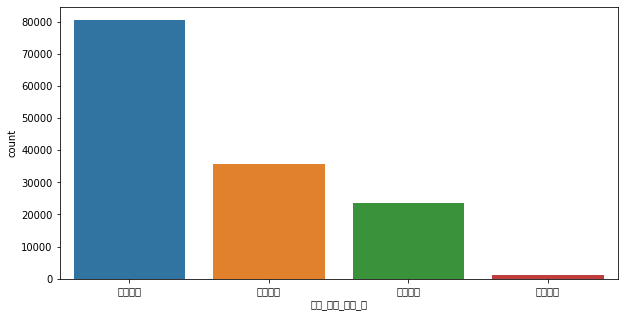

In [3]:
plt.figure(figsize=(10,5))
sns.countplot(x=df2021['상권_구분_코드_명'])

plt.show

### 점포수 파악 

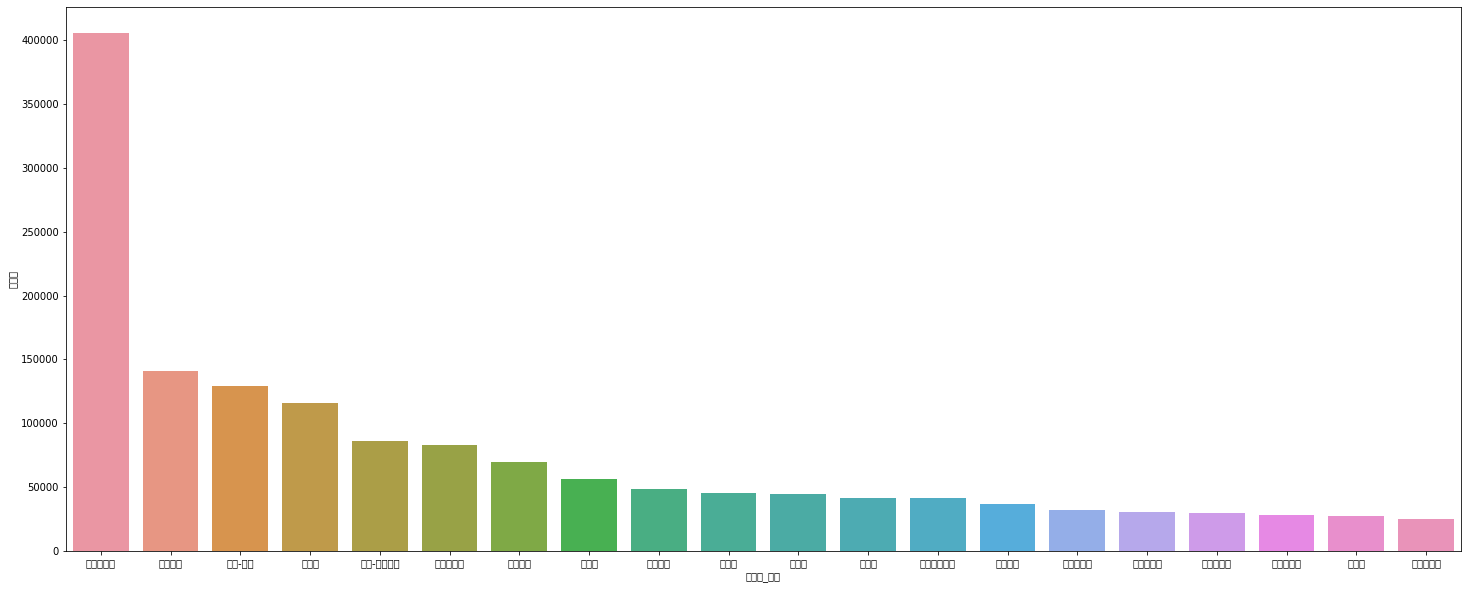

In [4]:
service=df2021.groupby('서비스_업종_코드_명').agg({'기준_년_코드':'count', '점포수':sum},as_index=False).reset_index()
service.columns=['서비스_업종','개수','점포수']

service=service.sort_values('점포수',ascending=False).iloc[:20]

plt.figure(figsize=(25,10))
sns.barplot(x=service['서비스_업종'],y=service['점포수'])

### 데이터 상관관계 확인 

In [5]:
all=df2021[['분기당_매출_금액','분기당_매출_건수','주중_매출_금액','주말_매출_금액']].corr()
plt.figure(figsize=(10,10))
# 상관관계를 표시하는 그래프 작석, annot=True => cell값 표시 안함 
# fmt = '.2f' 데이터 타입
sns.heatmap(data = all.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')


### 요일별 매출 추이  

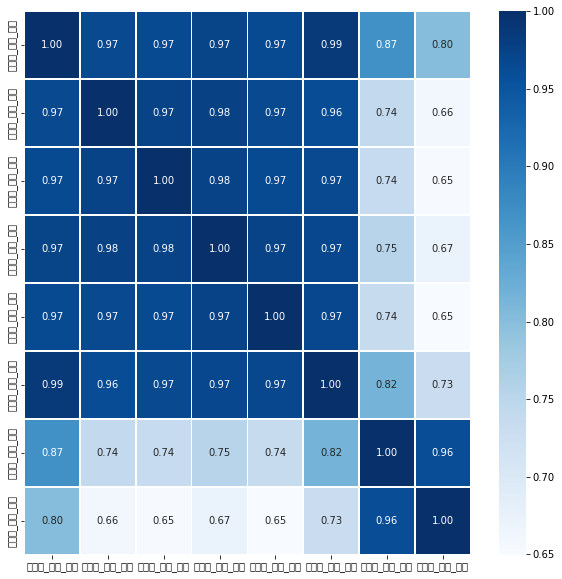

In [6]:
week=df2021[['분기당_매출_금액','월요일_매출_금액','화요일_매출_금액','수요일_매출_금액','목요일_매출_금액','금요일_매출_금액'
       ,'토요일_매출_금액','일요일_매출_금액']].corr()

plt.figure(figsize=(10,10))
sns.heatmap(data = week, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

### 시간대별 매출 추이   

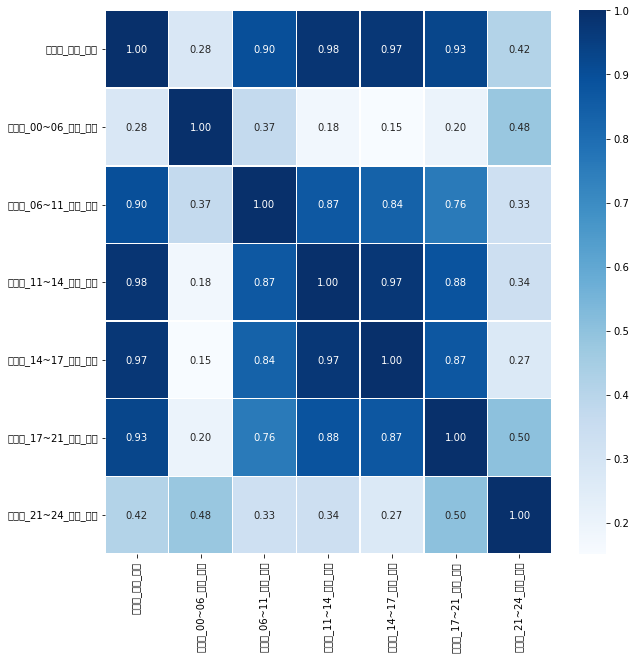

In [7]:
time=df2021[['분기당_매출_금액','시간대_00~06_매출_금액','시간대_06~11_매출_금액','시간대_11~14_매출_금액'
            ,'시간대_14~17_매출_금액','시간대_17~21_매출_금액','시간대_21~24_매출_금액']].corr()

plt.figure(figsize=(10,10))
sns.heatmap(data = time, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

### 성별 매출 추이  

In [8]:
gender=df2021[['분기당_매출_금액','여성_매출_금액','남성_매출_금액']].corr()

plt.figure(figsize=(10,10))
sns.heatmap(data = gender, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

### 연령별 매출 추이 

In [9]:
age=df2021[['분기당_매출_금액','연령대_10_매출_금액','연령대_20_매출_금액','연령대_30_매출_금액'
           ,'연령대_40_매출_금액','연령대_50_매출_금액','연령대_60_이상_매출_금액']].corr()

plt.figure(figsize=(10,10))
sns.heatmap(data = age, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

## 칼럼 명 변경 한글 ===> 영어  

In [10]:
# 칼럼중 총매출과 높은 상관관계를 보이는 칼럼. 
X=df2021[[ '분기당_매출_건수', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액',
       '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
       '일요일_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
       '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '남성_매출_금액',
       '여성_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
       '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', 
       '토요일_매출_건수', '시간대_건수~17_매출_건수',
      '연령대_50_매출_건수']]

y=df2021['분기당_매출_금액']      

In [11]:
# 칼럼 이름 변경경
X.columns=[['cnt','weekday_amt','weekend_amt','mon_amt','tue_amt','wed_amt','thu_amt','fri_amt','sat_amt','sun_amt','0611_amt','1114_amt',
           '1417_amt','1721_amt','man_amt','woman_amt','20_amt','30_amt','40_amt','50_amt','60_amt','sat_cnt','1417_cnt','50_cnt']]
           

### 주성분 분석(PCA) 

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()   

X_sca = scaler.fit_transform(X)

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(X_sca)
pcadf = pd.DataFrame(data=printcipalComponents)
# 주성분으로 이루어진 데이터 프레임 구성

In [14]:
pcadf.head()

0         1         2         3         4
0  0.020012 -0.156857  0.051805  0.120990 -0.141012
1 -0.408448  0.029470  0.051496  0.068897 -0.055465
2 -0.575737  0.225286  0.139532  0.046914 -0.018908
3 -0.561381  0.206972  0.125923  0.044142 -0.019560
4 -0.556304  0.239939  0.133984  0.047013 -0.019010

In [15]:
sum(pca.explained_variance_ratio_)

0.9727387548222693

In [16]:
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
lr=LinearRegression()

In [17]:
y.columns=[['tamt']]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(pcadf, y, test_size=0.3, random_state=0)

In [19]:
### degree = 2
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2,
                          include_bias=False)
# poly.fit_transform([[2, 3]])
train_poly=poly.fit_transform(X_train)
test_poly=poly.fit_transform(X_test)

print(train_poly.shape, test_poly.shape)

(98581, 20) (42249, 20)


In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, y_train)

# 훈련 데이터를 이용한 정확동
print(lr.score(train_poly, y_train))

# 테스트 데이터를 이용한 정확도
print(lr.score(test_poly, y_test))

0.9993348742694771
0.9929021274152359


In [21]:
# degree=3
poly = PolynomialFeatures(degree=3,
                          include_bias=False)
train_poly=poly.fit_transform(X_train)
test_poly=poly.fit_transform(X_test)

lr = LinearRegression()
lr.fit(train_poly, y_train)

# 훈련 데이터를 이용한 정확동
print(lr.score(train_poly, y_train))

# 테스트 데이터를 이용한 정확도
print(lr.score(test_poly, y_test))

0.9996207348059929
-2.1157644270829867


- 오버피팅 발생 

### 규제적용 

In [22]:
# 데이터 전처리(정규화=>train 데이터만 진행)
# degree = 3로 진행
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(train_poly) # train 데이터만 진행

train_scaled=ss.transform(train_poly)
test_scaled=ss.transform(test_poly)

# 릿지(Ridge) 적용
from sklearn.linear_model import Ridge

rideg=Ridge()
rideg.fit(train_scaled, y_train)

# 훈련 데이터를 이용한 정확동
print(rideg.score(train_scaled, y_train))

# 테스트 데이터를 이용한 정확도
print(rideg.score(test_scaled, y_test))

0.9995787448108492
0.9469288893596266


### 릿지(Ridge):L2 

In [23]:
# alpha을 조정해 결과 확인
train_sorce=[]
test_sorce=[]

alpha_lst=[0.001, 0.01, 1, 100, 1000]

for alpha in alpha_lst:
    rideg=Ridge(alpha=alpha)  # 릿지 모델 생성
    rideg.fit(train_scaled, y_train) # 릿지 모델 훈련
    
    # 훈련 데이터를 이용한 정확도 리스트에 추가
    train_sorce.append(rideg.score(train_scaled, y_train))

    # 테스트 데이터를 이용한 정확도 리스트에 추가
    test_sorce.append(rideg.score(test_scaled, y_test))

plt.plot(alpha_lst, train_sorce, label='train')
plt.plot(alpha_lst, test_sorce, label='test')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

### 라쏘(Lass) : L1 

In [24]:
from sklearn.linear_model import Lasso

lasso=Lasso()
lasso.fit(train_scaled, y_train)

# 훈련 데이터를 이용한 정확동
print(lasso.score(train_scaled, y_train))

# 테스트 데이터를 이용한 정확도
print(lasso.score(test_scaled, y_test))

0.9994899727774308
0.9900940212892249


In [25]:
# alpha을 조정해 결과 확인
train_sorce=[]
test_sorce=[]

alpha_lst=[0.001, 0.01, 1, 100, 1000]

for alpha in alpha_lst:
    lasso=Lasso(alpha=alpha, max_iter=1000)  # max_iter: 반복 최대 횟수
    lasso.fit(train_scaled, y_train) # 라소 모델 훈련
    
    # 훈련 데이터를 이용한 정확도 리스트에 추가
    train_sorce.append(lasso.score(train_scaled, y_train))

    # 테스트 데이터를 이용한 정확도 리스트에 추가
    test_sorce.append(lasso.score(test_scaled, y_test))

plt.plot(np.log10(alpha_lst), train_sorce, label='train')
plt.plot(np.log10(alpha_lst), test_sorce, label='test')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

### 엘라스틱넷 

In [44]:
from sklearn.linear_model import ElasticNet

ela = ElasticNet(alpha=0.01, l1_ratio = 0.5, max_iter = 100000)
ela.fit(train_scaled, y_train)
print(ela.score(train_scaled, y_train))
print(ela.score(test_scaled, y_test))

0.9990332128930739
0.9988595083410169


In [45]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(98581, 5) (42249, 5)
(98581,) (42249,)


In [1]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

# lr = LogisticRegression()
# lr.fit(X_train, y_train)
# pred= lr.predict(X_test)
# accscr = accuracy_score(y_test, pred)
# print('LogisticRegression accuracy_scroe:%.4f'%(accscr))

NameError: ignored